In [412]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [413]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ldhfIqhcgh3tRCy5PolYy_gR7loWakDDvxJBmrS58XqC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'croprecommendation-donotdelete-pr-wbu2e1ya1mvtrm'
object_key = 'Crop_recommendation (1).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [414]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [415]:
# DATA DICTIONARY & EDA( Exploratory Data Analysis )

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [417]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [418]:
df.shape

(2200, 8)

In [419]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.55,36.92,0.00,21.00,37.00,84.25,140.00
P,2200.0,53.36,32.99,5.00,28.00,51.00,68.00,145.00
K,2200.0,48.15,50.65,5.00,20.00,32.00,49.00,205.00
temperature,2200.0,25.62,5.06,8.83,22.77,25.60,28.56,43.68
humidity,2200.0,71.48,22.26,14.26,60.26,80.47,89.95,99.98
ph,2200.0,6.47,0.77,3.50,5.97,6.43,6.92,9.94
rainfall,2200.0,103.46,54.96,20.21,64.55,94.87,124.27,298.56


In [420]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [421]:
# bivariate analysis

In [422]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [423]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [424]:
# OBSERVATION

In [425]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [426]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [428]:
dum=pd.get_dummies(df['label'])

In [429]:
x=pd.concat([df.drop('label',axis=1),dum],axis=1)

In [430]:
y=df['label']

In [431]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [432]:
df.groupby(df['label']).agg(np.mean)

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


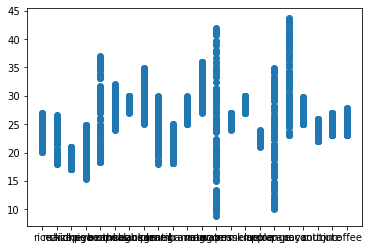

In [433]:
plt.scatter(df['label'],df['temperature'])

<AxesSubplot:xlabel='temperature', ylabel='Density'>

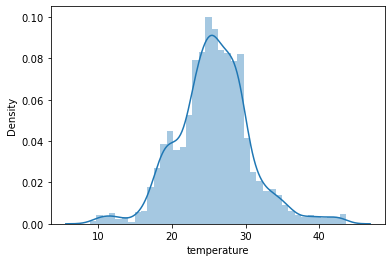

In [434]:
sns.distplot(df['temperature'])

In [435]:
# OUTLIERS 

<AxesSubplot:>

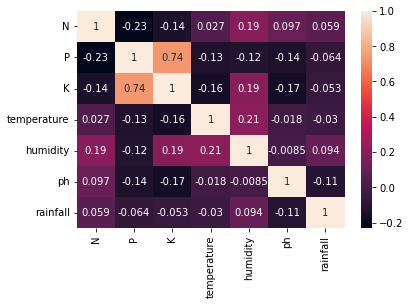

In [436]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='humidity'>

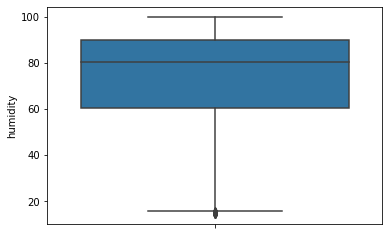

In [437]:
sns.boxplot(y=df['humidity'])
# 1 outlier --> humidity --> chickpea 

<AxesSubplot:ylabel='ph'>

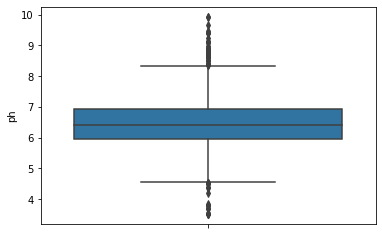

In [438]:
sns.boxplot(y=df['ph'])

<AxesSubplot:ylabel='temperature'>

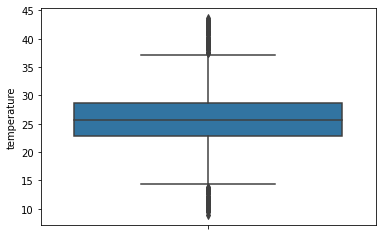

In [439]:
sns.boxplot(y=df['temperature'])

<AxesSubplot:ylabel='rainfall'>

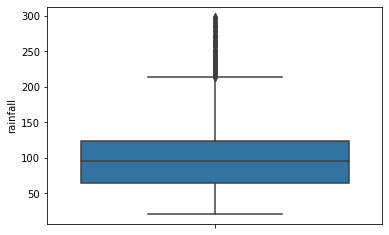

In [440]:
sns.boxplot(y=df['rainfall'])

<AxesSubplot:ylabel='N'>

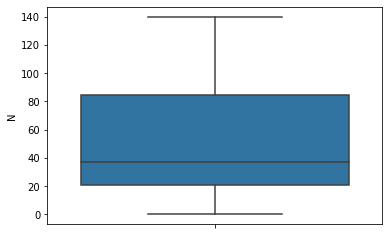

In [441]:
sns.boxplot(y=df['N'])

<AxesSubplot:ylabel='P'>

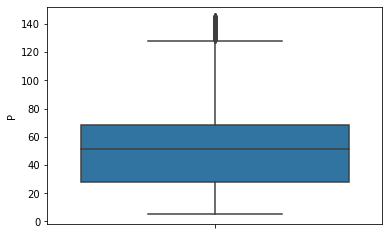

In [442]:
sns.boxplot(y=df['P'])

<AxesSubplot:ylabel='K'>

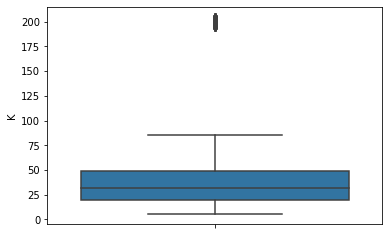

In [443]:
sns.boxplot(y=df['K'])

**Humidity  outliers replacing**

<AxesSubplot:xlabel='humidity'>

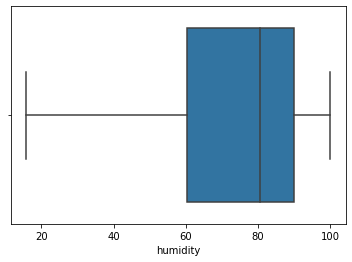

In [466]:
sns.boxplot(df.humidity)

In [467]:
q1=df.humidity.quantile(0.25)  #(Q1)
q3=df.humidity.quantile(0.75)  #(Q3)

In [468]:
IQR=q3-q1

In [469]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [470]:
lower_limit


15.731725873750001

In [471]:
upper_limit

134.47899768374998

In [472]:
df['humidity']= np.where(df['humidity']<lower_limit,lower_limit,df['humidity'])

<AxesSubplot:xlabel='humidity'>

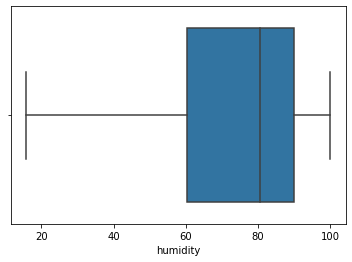

In [473]:
sns.boxplot(df.humidity)

**ph outliers replace**

<AxesSubplot:ylabel='ph'>

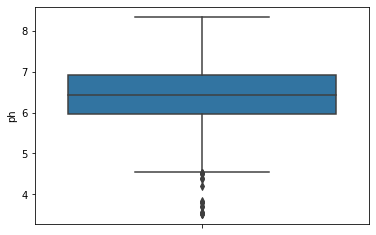

In [474]:
sns.boxplot(y=df['ph'])

In [483]:
q1=df.ph.quantile(0.25)  #(Q1)
q3=df.ph.quantile(0.75)  #(Q3)

In [484]:
IQR=q3-q1

In [485]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [486]:
lower_limit


4.543768066249998

In [487]:
upper_limit

8.351567354250005

In [488]:
df['ph']= np.where(df['ph']<lower_limit,lower_limit,df['ph'])

<AxesSubplot:xlabel='ph'>

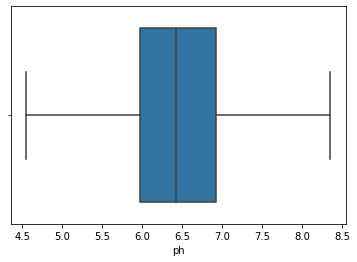

In [489]:
sns.boxplot(df.ph)

**temperature outliers replace**

<AxesSubplot:xlabel='temperature'>

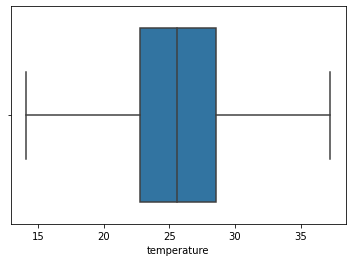

In [505]:
sns.boxplot(df.temperature)

In [499]:
q1=df.temperature.quantile(0.25)  #(Q1)
q3=df.temperature.quantile(0.75)  #(Q3)

In [500]:
IQR=q3-q1

In [501]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [502]:
lower_limit

14.080955682499999

In [503]:
upper_limit

37.2500728825

In [504]:
df['temperature']= np.where(df['temperature']<lower_limit,lower_limit,df['temperature'])

**Rainfall replace outliers**

<AxesSubplot:xlabel='rainfall'>

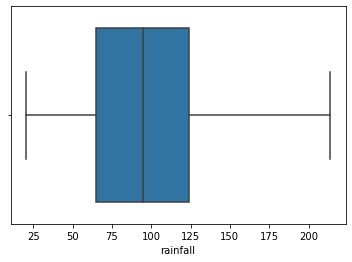

In [513]:
sns.boxplot(df.rainfall)

In [507]:
q1=df.rainfall.quantile(0.25)  #(Q1)
q3=df.rainfall.quantile(0.75)  #(Q3)

In [508]:
IQR=q3-q1

In [509]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [510]:
lower_limit

-25.022046700000033

In [511]:
upper_limit

213.84124050000003

In [512]:
df['rainfall']= np.where(df['rainfall']>upper_limit,upper_limit,df['rainfall'])

**P ouliers replace**

<AxesSubplot:xlabel='P'>

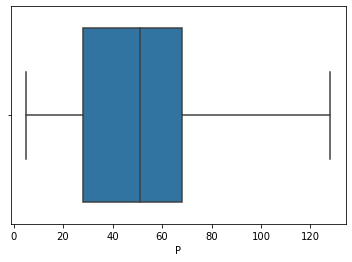

In [521]:
sns.boxplot(df.P)

In [515]:
q1=df.P.quantile(0.25)  #(Q1)
q3=df.P.quantile(0.75)  #(Q3)

In [516]:
IQR=q3-q1

In [517]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [518]:
lower_limit


-32.0

In [519]:
upper_limit

128.0

In [520]:
df['P']= np.where(df['P']>upper_limit,upper_limit,df['P'])

**K outliers replace**

<AxesSubplot:xlabel='K'>

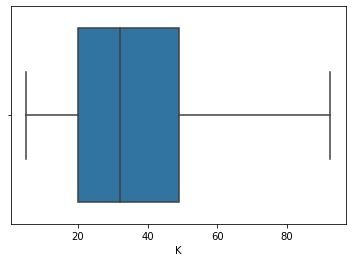

In [529]:
sns.boxplot(df.K)

In [523]:
q1=df.K.quantile(0.25)  #(Q1)
q3=df.K.quantile(0.75)  #(Q3)

In [524]:
IQR=q3-q1

In [525]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [526]:
lower_limit

-23.5

In [527]:
upper_limit


92.5

In [528]:
df['K']= np.where(df['K']>upper_limit,upper_limit,df['K'])

**CHECKING OUTLIERS**

<AxesSubplot:xlabel='N'>

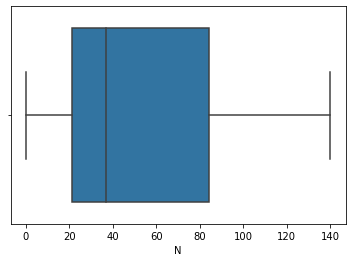

In [530]:
sns.boxplot(df.N)

<AxesSubplot:xlabel='P'>

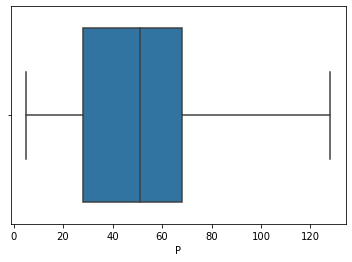

In [531]:
sns.boxplot(df.P)

<AxesSubplot:xlabel='K'>

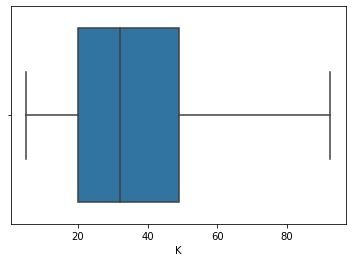

In [532]:
sns.boxplot(df.K)

<AxesSubplot:xlabel='temperature'>

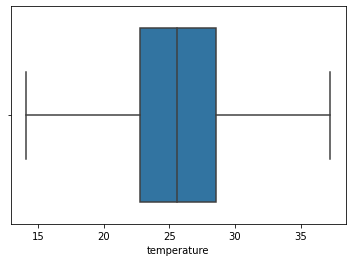

In [533]:
sns.boxplot(df.temperature)

<AxesSubplot:xlabel='humidity'>

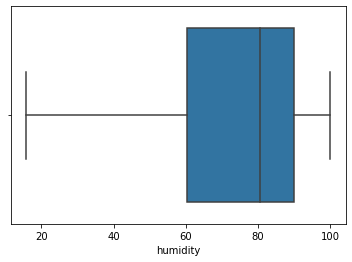

In [534]:
sns.boxplot(df.humidity)

<AxesSubplot:xlabel='ph'>

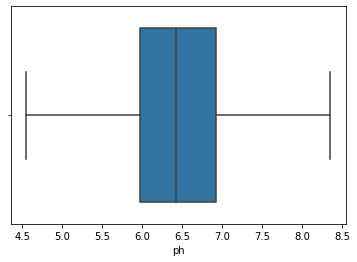

In [535]:
sns.boxplot(df.ph)

<AxesSubplot:xlabel='rainfall'>

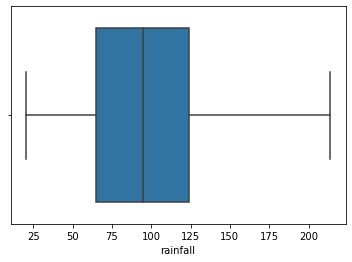

In [536]:
sns.boxplot(df.rainfall)

In [537]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,213.841241,rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,213.841241,rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,213.841241,rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,213.841241,rice


# X and y split

In [538]:
X=df.drop(columns=['label'],axis = 1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85,58.0,41.0,21.770462,80.319644,7.038096,213.841241
2,60,55.0,44.0,23.004459,82.320763,7.840207,213.841241
3,74,35.0,40.0,26.491096,80.158363,6.980401,213.841241
4,78,42.0,42.0,20.130175,81.604873,7.628473,213.841241


In [539]:
y = df.label
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [540]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [541]:
scaled_x = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled_x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.300813,0.434286,0.293442,0.786598,0.514527,0.943678
1,0.607143,0.430894,0.411429,0.331886,0.766621,0.655058,1.000000
2,0.428571,0.406504,0.445714,0.385146,0.790373,0.865707,1.000000
3,0.528571,0.243902,0.400000,0.535633,0.764706,0.639906,1.000000
4,0.557143,0.300813,0.422857,0.261090,0.781876,0.810102,1.000000


# train test split

In [542]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.2,random_state = 1)

In [543]:
x_train.shape

(1760, 7)

In [544]:
x_test.shape

(440, 7)

## Model building


In [545]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [546]:
lr = LogisticRegression()
dtc= DecisionTreeClassifier()
rf = RandomForestClassifier()
knn=KNeighborsClassifier()
nb=GaussianNB()
svm = SVC()
xgb=XGBClassifier()


In [547]:
lr.fit(x_train,y_train)

LogisticRegression()

In [548]:
dtc.fit(x_train,y_train)


DecisionTreeClassifier()

In [549]:
rf.fit(x_train,y_train)


RandomForestClassifier()

In [550]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [551]:
nb.fit(x_train,y_train)


GaussianNB()

In [552]:
# svm.fit(x_train,y_train)

In [553]:
# xgb.fit(x_train,y_train)

In [554]:
y_test

1276         grapes
1446      muskmelon
335     kidneybeans
1458      muskmelon
2038           jute
           ...     
1508          apple
1595          apple
1032         banana
1330     watermelon
1263         grapes
Name: label, Length: 440, dtype: object

model_id

In [555]:
lrpred_test= lr.predict(x_test)
lrpred_test

array(['grapes', 'muskmelon', 'kidneybeans', 'muskmelon', 'jute',
       'watermelon', 'kidneybeans', 'orange', 'rice', 'pigeonpeas',
       'pomegranate', 'rice', 'coffee', 'mango', 'mothbeans', 'banana',
       'banana', 'coconut', 'banana', 'orange', 'lentil', 'apple',
       'pomegranate', 'papaya', 'muskmelon', 'banana', 'grapes',
       'coconut', 'cotton', 'watermelon', 'cotton', 'maize', 'muskmelon',
       'apple', 'blackgram', 'cotton', 'mothbeans', 'blackgram',
       'mungbean', 'orange', 'pigeonpeas', 'grapes', 'orange', 'papaya',
       'coconut', 'pomegranate', 'rice', 'coffee', 'chickpea', 'jute',
       'chickpea', 'maize', 'lentil', 'pomegranate', 'coffee', 'mungbean',
       'watermelon', 'watermelon', 'cotton', 'mango', 'blackgram',
       'mungbean', 'pomegranate', 'banana', 'coffee', 'muskmelon',
       'chickpea', 'grapes', 'apple', 'rice', 'grapes', 'mango', 'orange',
       'maize', 'rice', 'watermelon', 'watermelon', 'maize', 'cotton',
       'mango', 'chickpe

In [556]:
lrpred_test= lr.predict(x_test)
dtcpred_test= dtc.predict(x_test)
rfpred_test= rf.predict(x_test)
knnpred_test= knn.predict(x_test)
nbpred_test= nb.predict(x_test)
# svmpred_test= svm.predict(x_test)
# xgbpred_test= xgb.predict(x_test)

In [557]:
lrpred_train = lr.predict(x_train)
dtcpred_train = dtc.predict(x_train)
rfpred_train = rf.predict(x_train)
knnpred_train = knn.predict(x_train)
nbpred_train = nb.predict(x_train)
# svmpred_train = svm.predict(x_train)
# xgbpred_train = xgb.predict(x_train)

#Accuracy Score

In [558]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

#Logistic regression is noly for 2 categories
not only consider accuracy but also all performance metrics
-> optimal one should be choosen from over and underfitting
overfitting - test>train
underfitting - test<<<<<train ex: 72 & 97
optimal - test<train ex: 97 & 99

In [559]:
accuracy_score(y_test,lrpred_test) # test accuracy

0.925

In [560]:
accuracy_score(y_train,lrpred_train) # train accuracy

0.9477272727272728

In [561]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

In [562]:
pd.crosstab(y_test,lrpred_test)

col_0,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
label,,,,,,,,,,,,,,,,,,,,,
apple,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
banana,0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blackgram,0,0,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chickpea,0,0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
coconut,0,0,0,0,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
coffee,0,0,0,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cotton,0,0,0,0,0,0,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grapes,0,0,0,0,0,0,0,29,0,0,...,0,0,0,0,0,0,0,0,0,0
jute,0,0,0,0,0,0,0,0,13,0,...,0,0,0,0,0,0,0,0,12,0


In [563]:
print(classification_report(y_test,lrpred_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       0.83      0.91      0.87        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       0.92      1.00      0.96        22
      grapes       1.00      1.00      1.00        29
        jute       0.93      0.52      0.67        25
 kidneybeans       0.90      0.95      0.93        20
      lentil       0.90      1.00      0.95        18
       maize       1.00      0.90      0.95        20
       mango       0.80      0.94      0.86        17
   mothbeans       0.94      0.71      0.81        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

In [564]:
probability = lr.predict_proba(x_test)[:,1]

In [565]:
fpr,tpr,thresholds = roc_curve(y_test,probability)

ValueError: multiclass format is not supported

#Decision tree

In [566]:
accuracy_score(y_test,dtcpred_test) 

0.9954545454545455

In [567]:
accuracy_score(y_train,dtcpred_train) 

1.0

In [568]:
probability = dtc.predict_proba(x_test)[:,1]
probability

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [569]:
roc_auc_score(y_test,probability)

ValueError: multi_class must be in ('ovo', 'ovr')

In [570]:
score = cross_val_score(dtc, X, y,cv=5)
score

array([0.99090909, 0.98409091, 0.98636364, 0.99318182, 0.98181818])

In [571]:
print(classification_report(y_test,dtcpred_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        29
        jute       0.96      1.00      0.98        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

#Random forest

In [572]:
accuracy_score(y_test,rfpred_test) 

0.9977272727272727

In [573]:
accuracy_score(y_train,rfpred_train) 

1.0

In [574]:
probability = rf.predict_proba(x_test)

In [575]:
score = cross_val_score(rf, X, y,cv=5)
score

array([0.99772727, 0.99318182, 0.99772727, 0.99545455, 0.98636364])

#KNN

In [576]:
accuracy_score(y_test,knnpred_test) 

0.9772727272727273

In [577]:
accuracy_score(y_train,knnpred_train) 

0.9903409090909091

In [578]:
probability = knn.predict_proba(x_test)[:,1]
probability

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [579]:
score = cross_val_score(knn, X, y,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.98181818, 0.97954545])

In [580]:
print(classification_report(y_test,knnpred_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       0.96      1.00      0.98        22
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.96      0.92        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      1.00      0.92        18
       maize       1.00      0.95      0.97        20
       mango       0.94      1.00      0.97        17
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

#Naive Bayes

In [581]:
accuracy_score(y_test,nbpred_test) 

0.9954545454545455

In [582]:
accuracy_score(y_train,nbpred_train) 

0.9948863636363636

In [583]:
probability = nb.predict_proba(x_test)[:,1]
probability

array([4.02056610e-070, 1.22766868e-037, 1.69336124e-126, 3.99041211e-040,
       1.08471556e-025, 3.88254997e-026, 1.61902727e-132, 8.39318133e-096,
       7.30830770e-029, 4.27141652e-065, 5.08808401e-037, 2.64068232e-027,
       1.44726471e-053, 2.64843782e-063, 5.61253221e-081, 1.00000000e+000,
       1.00000000e+000, 6.84760709e-040, 1.00000000e+000, 4.27800968e-078,
       2.06597370e-052, 5.86539227e-062, 1.92106621e-046, 8.05734571e-015,
       1.63222332e-039, 1.00000000e+000, 1.30425818e-071, 1.42392801e-060,
       6.94611574e-037, 1.69849908e-031, 1.66590007e-030, 1.55953785e-022,
       1.99548954e-038, 1.40800535e-062, 1.88812593e-059, 1.60823776e-024,
       8.11574854e-049, 2.64818798e-048, 1.15643358e-033, 5.38236621e-069,
       2.14676707e-037, 1.34111040e-064, 3.24493030e-066, 1.23663127e-020,
       1.05932217e-049, 2.20163734e-042, 4.06708319e-035, 4.74243497e-031,
       1.43271211e-158, 1.65128402e-025, 1.49721268e-160, 1.25234362e-041,
       2.05572187e-058, 3

In [584]:
score = cross_val_score(nb, X, y,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

#SVM

In [585]:
# accuracy_score(y_test,svmpred_test) 

In [586]:
# accuracy_score(y_train,svmpred_train) 

In [587]:
# score = cross_val_score(svm, X, y,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

#XGB

In [588]:
# accuracy_score(y_test,xgbpred_test) 

In [589]:
# accuracy_score(y_train,xgbpred_train) 

In [590]:
# score = cross_val_score(xgb, X, y,cv=5)
# score

cross validation score is nothing but if we take 5 as cv=5 then 4 different samples are trained and 1 sample is tested

#Hyper parameter tunning

In [591]:
from sklearn.model_selection import RandomizedSearchCV

In [592]:
param_dist = {"max_depth": range(1,20) ,
              "min_samples_leaf": range(1,10),
              "criterion": ["gini"]}

In [593]:
tree_cv = RandomizedSearchCV(dtc, param_dist, cv=5)

In [594]:
tree_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(1, 10)})

In [595]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 3, 'max_depth': 15, 'criterion': 'gini'}
Best score is 0.9818181818181818


In [596]:
tree_cv.best_estimator_.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=3)

In [597]:
mod_rs=tree_cv.best_estimator_

In [598]:
mod_rs.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=3)

In [599]:
pred_rs=mod_rs.predict(x_test)

In [600]:
print(classification_report(y_test,pred_rs))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        29
        jute       0.96      0.92      0.94        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

In [614]:
!pip install ibm_watson_machine_learning

In [615]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url" :"https://us-south.ml.cloud.ibm.com",
    "apikey":"WezMsA_u5_AkYOA-tEcRDl16kJHorqyB3n8KB7sytask"
}
client = APIClient(wml_credentials)

In [616]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------  ------------------------
ID                                    NAME        CREATED
79da55aa-9549-4413-b7ca-ba7e681316e6  deployment  2022-11-12T18:13:33.863Z
------------------------------------  ----------  ------------------------


In [617]:
space_uid="79da55aa-9549-4413-b7ca-ba7e681316e6"

In [618]:
client.set.default_space(space_uid)

'SUCCESS'

In [619]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [620]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [621]:
model_details = client.repository.store_model(model=mod_rs,meta_props={
    client.repository.ModelMetaNames.NAME:"Crop_recommending",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [622]:
model_id

'b99eedae-48a6-436e-a97c-cdf8870c1890'

In [623]:
type(mod_rs)

sklearn.tree._classes.DecisionTreeClassifier

In [640]:
client.repository.get_model_id(model_details)

'b99eedae-48a6-436e-a97c-cdf8870c1890'

In [638]:
deployment_props={
    client.deployments.ConfigurationMetaNames.NAME:'deployment',
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [641]:
deployment=client.deployments.create('b99eedae-48a6-436e-a97c-cdf8870c1890',meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'b99eedae-48a6-436e-a97c-cdf8870c1890' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e49b35f5-4066-4181-9c8a-91476859e653'
------------------------------------------------------------------------------------------------




In [631]:
import pickle
with open('mod.pkl','wb') as files:
    pickle.dump(mod_rs,files)

In [632]:
with open('mod.pkl','rb') as f:
    lr = pickle.load(f)